In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
hmo = pd.read_csv("https://intro-datascience.s3.us-east-2.amazonaws.com/HMO_data.csv")

In [5]:
hmo.head()

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost
0,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0.0,female,1746
1,2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0.0,male,602
2,3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0.0,male,576
3,4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1.0,male,5562
4,5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0.0,male,836


In [6]:
hmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7582 entries, 0 to 7581
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                7582 non-null   int64  
 1   age              7582 non-null   int64  
 2   bmi              7504 non-null   float64
 3   children         7582 non-null   int64  
 4   smoker           7582 non-null   object 
 5   location         7582 non-null   object 
 6   location_type    7582 non-null   object 
 7   education_level  7582 non-null   object 
 8   yearly_physical  7582 non-null   object 
 9   exercise         7582 non-null   object 
 10  married          7582 non-null   object 
 11  hypertension     7502 non-null   float64
 12  gender           7582 non-null   object 
 13  cost             7582 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 829.4+ KB


In [9]:
hmo.isnull().sum()

X                   0
age                 0
bmi                78
children            0
smoker              0
location            0
location_type       0
education_level     0
yearly_physical     0
exercise            0
married             0
hypertension       80
gender              0
cost                0
dtype: int64

In [16]:
hmo['hypertension'] = hmo['hypertension'].interpolate(method='linear')

In [14]:
hmo['bmi']=hmo['bmi'].interpolate(method='linear')

In [17]:
hmo.isnull().sum()

X                  0
age                0
bmi                0
children           0
smoker             0
location           0
location_type      0
education_level    0
yearly_physical    0
exercise           0
married            0
hypertension       0
gender             0
cost               0
dtype: int64

In [18]:
hmo.describe()

,X,age,bmi,children,hypertension,cost
count,7.582000e+03,7582.000000,7582.000000,7582.000000,7582.000000,7582.000000
mean,7.126017e+05,38.885650,30.796777,1.109470,0.200475,4042.961224
std,5.357253e+06,14.177376,5.976147,1.219004,0.399145,4928.693949
min,1.000000e+00,18.000000,15.960000,0.000000,0.000000,2.000000
25%,5.634750e+03,26.000000,26.600000,0.000000,0.000000,970.000000
50%,2.491650e+04,39.000000,30.495000,1.000000,0.000000,2500.000000
75%,1.184860e+05,51.000000,34.700000,2.000000,0.000000,4775.000000
max,1.311011e+08,66.000000,53.130000,5.000000,1.000000,55715.000000


In [20]:
hmo['location_type'].value_counts()

Urban      5679
Country    1903
Name: location_type, dtype: int64

In [21]:
hmo['location'].value_counts()

PENNSYLVANIA     4010
MARYLAND          747
RHODE ISLAND      704
CONNECTICUT       611
NEW YORK          547
NEW JERSEY        498
MASSACHUSETTS     465
Name: location, dtype: int64

In [30]:
avg_cost = hmo.groupby(['location','location_type'])['cost'].mean().reset_index()
avg_cost

,location,location_type,cost
0,CONNECTICUT,Country,3607.403509
1,CONNECTICUT,Urban,3940.836364
2,MARYLAND,Country,4043.441989
3,MARYLAND,Urban,3701.263251
4,MASSACHUSETTS,Country,4343.042857
5,MASSACHUSETTS,Urban,4235.015385
6,NEW JERSEY,Country,3795.458015
7,NEW JERSEY,Urban,3978.790191
8,NEW YORK,Country,4256.239130
9,NEW YORK,Urban,4798.246944


In [31]:
merge_df = pd.merge(hmo, avg_cost, on=['location', 'location_type'])

In [33]:
merge_df['cost'] = merge_df['cost_x']

In [34]:
merge_df['avg_cost'] = merge_df['cost_y']

In [37]:
merge_df.drop(['cost_x','cost_y'], axis = 1)

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,avg_cost
0,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0.0,female,1746,3940.836364
1,12,61,26.290,0,yes,CONNECTICUT,Urban,No College Degree,No,Active,Married,0.0,female,4492,3940.836364
2,229,41,31.635,1,no,CONNECTICUT,Urban,Bachelor,Yes,Not-Active,Not_Married,0.0,female,2253,3940.836364
3,248,25,35.860,0,no,CONNECTICUT,Urban,Bachelor,No,Not-Active,Married,0.0,male,800,3940.836364
4,257,55,33.630,0,yes,CONNECTICUT,Urban,No College Degree,No,Not-Active,Not_Married,0.0,male,15994,3940.836364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,13353,18,31.920,0,no,NEW YORK,Country,Master,No,Not-Active,Not_Married,1.0,female,521,4256.239130
7578,76111,22,34.580,2,no,NEW YORK,Country,Bachelor,No,Not-Active,Married,0.0,female,1037,4256.239130
7579,4365,61,33.110,3,no,NEW YORK,Country,Bachelor,No,Active,Married,0.0,male,3877,4256.239130
7580,58912,60,35.910,0,no,NEW YORK,Country,Master,No,Not-Active,Married,0.0,female,7770,4256.239130


In [39]:
merge_df['exp'] = ['expensive' if row['cost'] > row['avg_cost'] else 'not expensive' for index, row in merge_df.iterrows()]

In [40]:
merge_df

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost_x,cost_y,cost,avg_cost,exp
0,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0.0,female,1746,3940.836364,1746,3940.836364,not expensive
1,12,61,26.290,0,yes,CONNECTICUT,Urban,No College Degree,No,Active,Married,0.0,female,4492,3940.836364,4492,3940.836364,expensive
2,229,41,31.635,1,no,CONNECTICUT,Urban,Bachelor,Yes,Not-Active,Not_Married,0.0,female,2253,3940.836364,2253,3940.836364,not expensive
3,248,25,35.860,0,no,CONNECTICUT,Urban,Bachelor,No,Not-Active,Married,0.0,male,800,3940.836364,800,3940.836364,not expensive
4,257,55,33.630,0,yes,CONNECTICUT,Urban,No College Degree,No,Not-Active,Not_Married,0.0,male,15994,3940.836364,15994,3940.836364,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,13353,18,31.920,0,no,NEW YORK,Country,Master,No,Not-Active,Not_Married,1.0,female,521,4256.239130,521,4256.239130,not expensive
7578,76111,22,34.580,2,no,NEW YORK,Country,Bachelor,No,Not-Active,Married,0.0,female,1037,4256.239130,1037,4256.239130,not expensive
7579,4365,61,33.110,3,no,NEW YORK,Country,Bachelor,No,Active,Married,0.0,male,3877,4256.239130,3877,4256.239130,not expensive
7580,58912,60,35.910,0,no,NEW YORK,Country,Master,No,Not-Active,Married,0.0,female,7770,4256.239130,7770,4256.239130,expensive


<AxesSubplot:xlabel='bmi', ylabel='Count'>

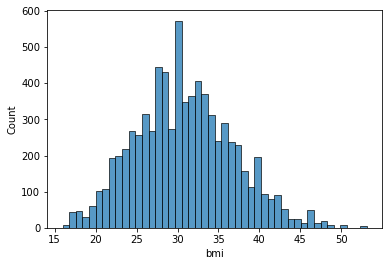

In [42]:
sns.histplot(x = 'bmi', data = merge_df)

<AxesSubplot:xlabel='age', ylabel='Count'>

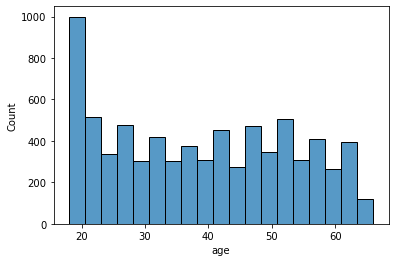

In [45]:
sns.histplot(x = 'age', data = merge_df)

<AxesSubplot:xlabel='children', ylabel='Count'>

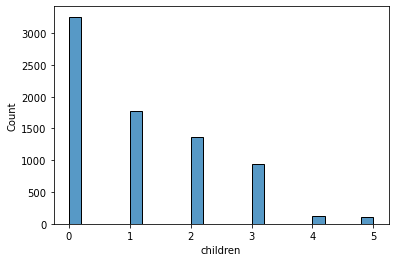

In [46]:
sns.histplot(x = 'children', data = merge_df)

In [47]:
merge_df['exp'].value_counts()

not expensive    5224
expensive        2358
Name: exp, dtype: int64

In [49]:
merge_df.loc[merge_df['smoker'] == 'no', 'smoker'] = 0
merge_df.loc[merge_df['smoker'] == 'yes', 'smoker'] = 1

In [50]:
merge_df.loc[merge_df['exercise'] == 'Not-Active', 'exercise'] = 0
merge_df.loc[merge_df['exercise'] == 'Active', 'exercise'] = 1

In [51]:
merge_df.loc[merge_df['yearly_physical'] == 'No', 'yearly_physical'] = 0
merge_df.loc[merge_df['yearly_physical'] == 'Yes', 'yearly_physical'] = 1

In [52]:
merge_df.loc[merge_df['married'] == 'Not_Married', 'married'] = 0
merge_df.loc[merge_df['married'] == 'Married', 'married'] = 1

In [53]:
merge_df

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost_x,cost_y,cost,avg_cost,exp
0,1,18,27.900,0,1,CONNECTICUT,Urban,Bachelor,0,1,1,0.0,female,1746,3940.836364,1746,3940.836364,not expensive
1,12,61,26.290,0,1,CONNECTICUT,Urban,No College Degree,0,1,1,0.0,female,4492,3940.836364,4492,3940.836364,expensive
2,229,41,31.635,1,0,CONNECTICUT,Urban,Bachelor,1,0,0,0.0,female,2253,3940.836364,2253,3940.836364,not expensive
3,248,25,35.860,0,0,CONNECTICUT,Urban,Bachelor,0,0,1,0.0,male,800,3940.836364,800,3940.836364,not expensive
4,257,55,33.630,0,1,CONNECTICUT,Urban,No College Degree,0,0,0,0.0,male,15994,3940.836364,15994,3940.836364,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,13353,18,31.920,0,0,NEW YORK,Country,Master,0,0,0,1.0,female,521,4256.239130,521,4256.239130,not expensive
7578,76111,22,34.580,2,0,NEW YORK,Country,Bachelor,0,0,1,0.0,female,1037,4256.239130,1037,4256.239130,not expensive
7579,4365,61,33.110,3,0,NEW YORK,Country,Bachelor,0,1,1,0.0,male,3877,4256.239130,3877,4256.239130,not expensive
7580,58912,60,35.910,0,0,NEW YORK,Country,Master,0,0,1,0.0,female,7770,4256.239130,7770,4256.239130,expensive


In [54]:
df1 = merge_df[merge_df['exp'] == 'expensive']

In [56]:
df2 = merge_df[merge_df['exp'] != 'expensive']

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost_x,cost_y,cost,avg_cost,exp
0,1,18,27.900,0,1,CONNECTICUT,Urban,Bachelor,0,1,1,0.0,female,1746,3940.836364,1746,3940.836364,not expensive
2,229,41,31.635,1,0,CONNECTICUT,Urban,Bachelor,1,0,0,0.0,female,2253,3940.836364,2253,3940.836364,not expensive
3,248,25,35.860,0,0,CONNECTICUT,Urban,Bachelor,0,0,1,0.0,male,800,3940.836364,800,3940.836364,not expensive
6,392,19,37.430,0,0,CONNECTICUT,Urban,Master,0,1,0,0.0,female,422,3940.836364,422,3940.836364,not expensive
8,428,18,29.165,0,0,CONNECTICUT,Urban,Bachelor,0,0,1,0.0,female,1940,3940.836364,1940,3940.836364,not expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,96412,45,24.795,3,0,NEW YORK,Country,Bachelor,1,0,1,0.0,male,3656,4256.239130,3656,4256.239130,not expensive
7577,13353,18,31.920,0,0,NEW YORK,Country,Master,0,0,0,1.0,female,521,4256.239130,521,4256.239130,not expensive
7578,76111,22,34.580,2,0,NEW YORK,Country,Bachelor,0,0,1,0.0,female,1037,4256.239130,1037,4256.239130,not expensive
7579,4365,61,33.110,3,0,NEW YORK,Country,Bachelor,0,1,1,0.0,male,3877,4256.239130,3877,4256.239130,not expensive


In [58]:
df1['age'] = df1['age'].astype('category')

/var/folders/y1/kyhhfdnx4t7064_w8m9v1mw40000gn/T/ipykernel_83360/3460285901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['age'].astype('category')


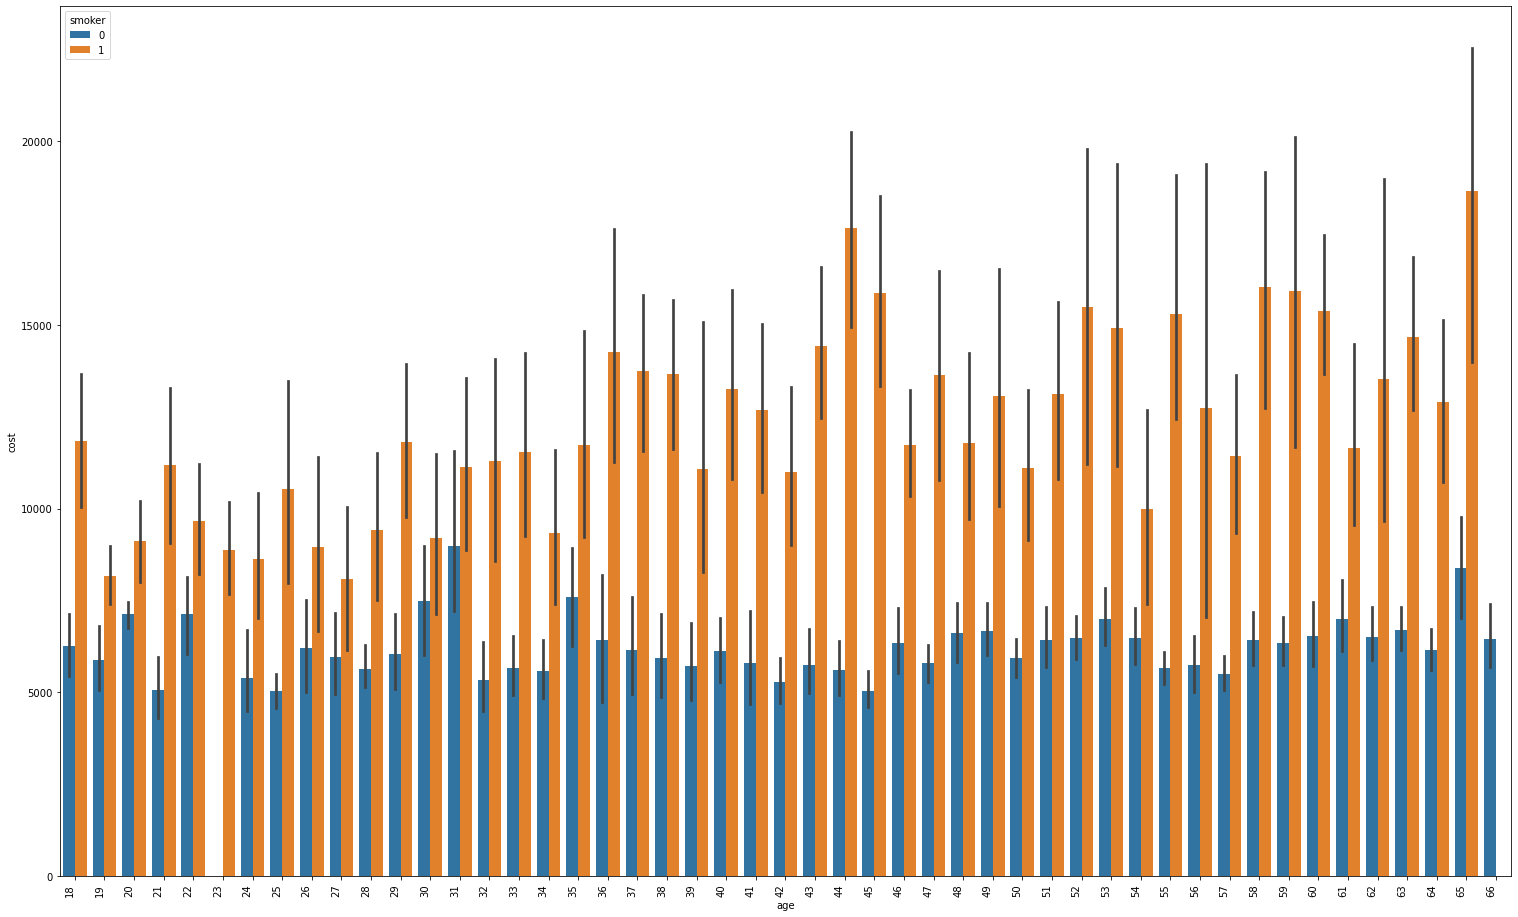

In [61]:
plt.figure(figsize=(26, 16))
sns.barplot(x='age', y='cost', hue='smoker', data=df1, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

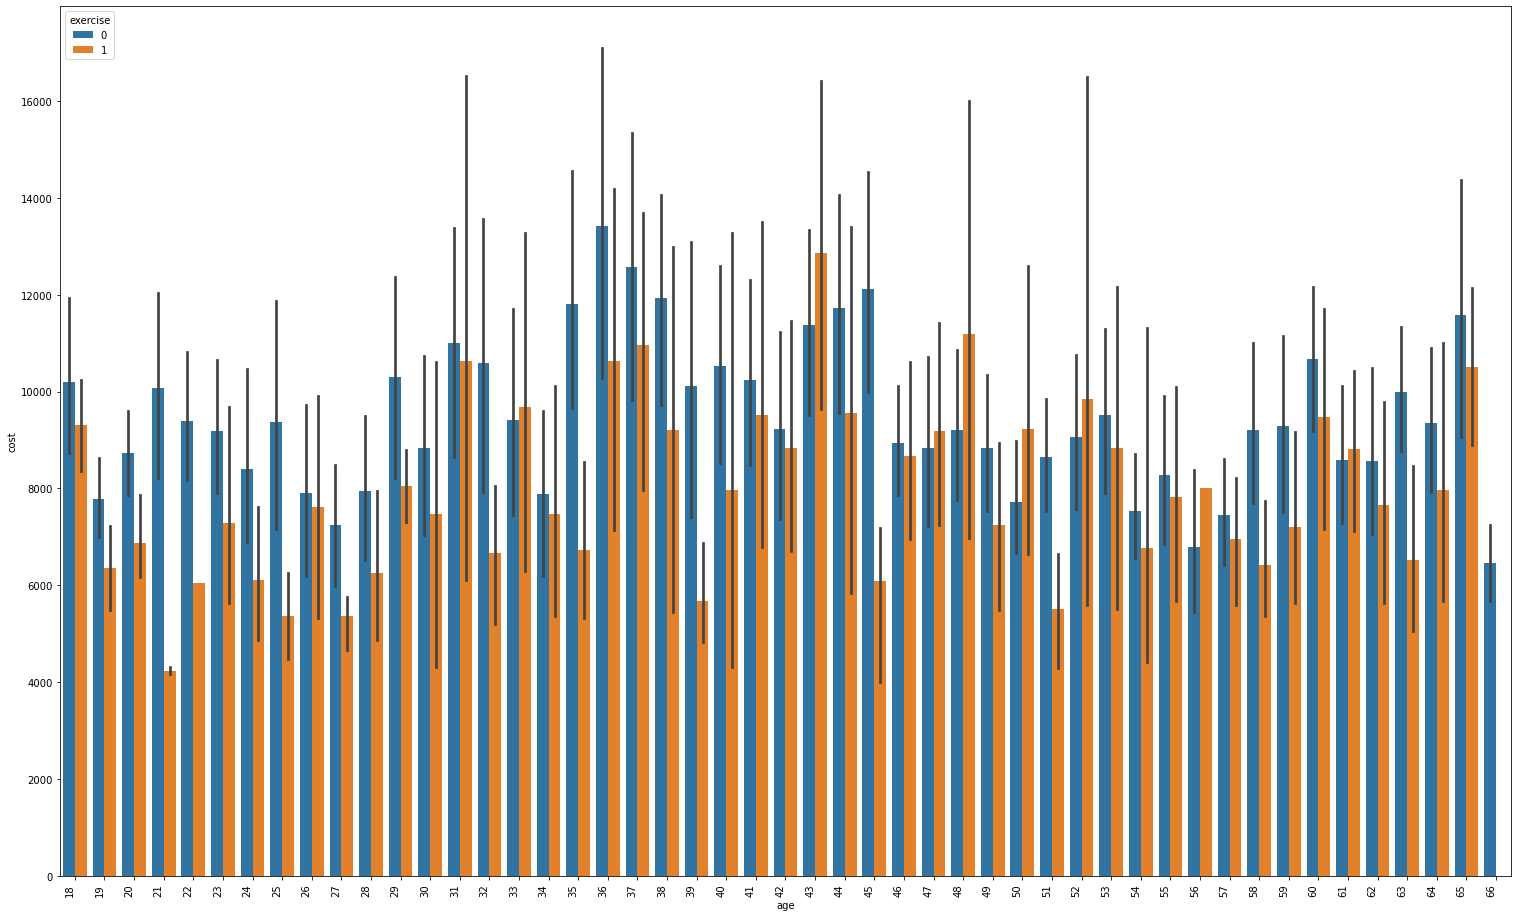

In [63]:
plt.figure(figsize=(26, 16))
sns.barplot(x='age', y='cost', hue='exercise', data=df1, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

In [62]:
df2['age'] = df2['age'].astype('category')

/var/folders/y1/kyhhfdnx4t7064_w8m9v1mw40000gn/T/ipykernel_83360/2628600728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2['age'].astype('category')


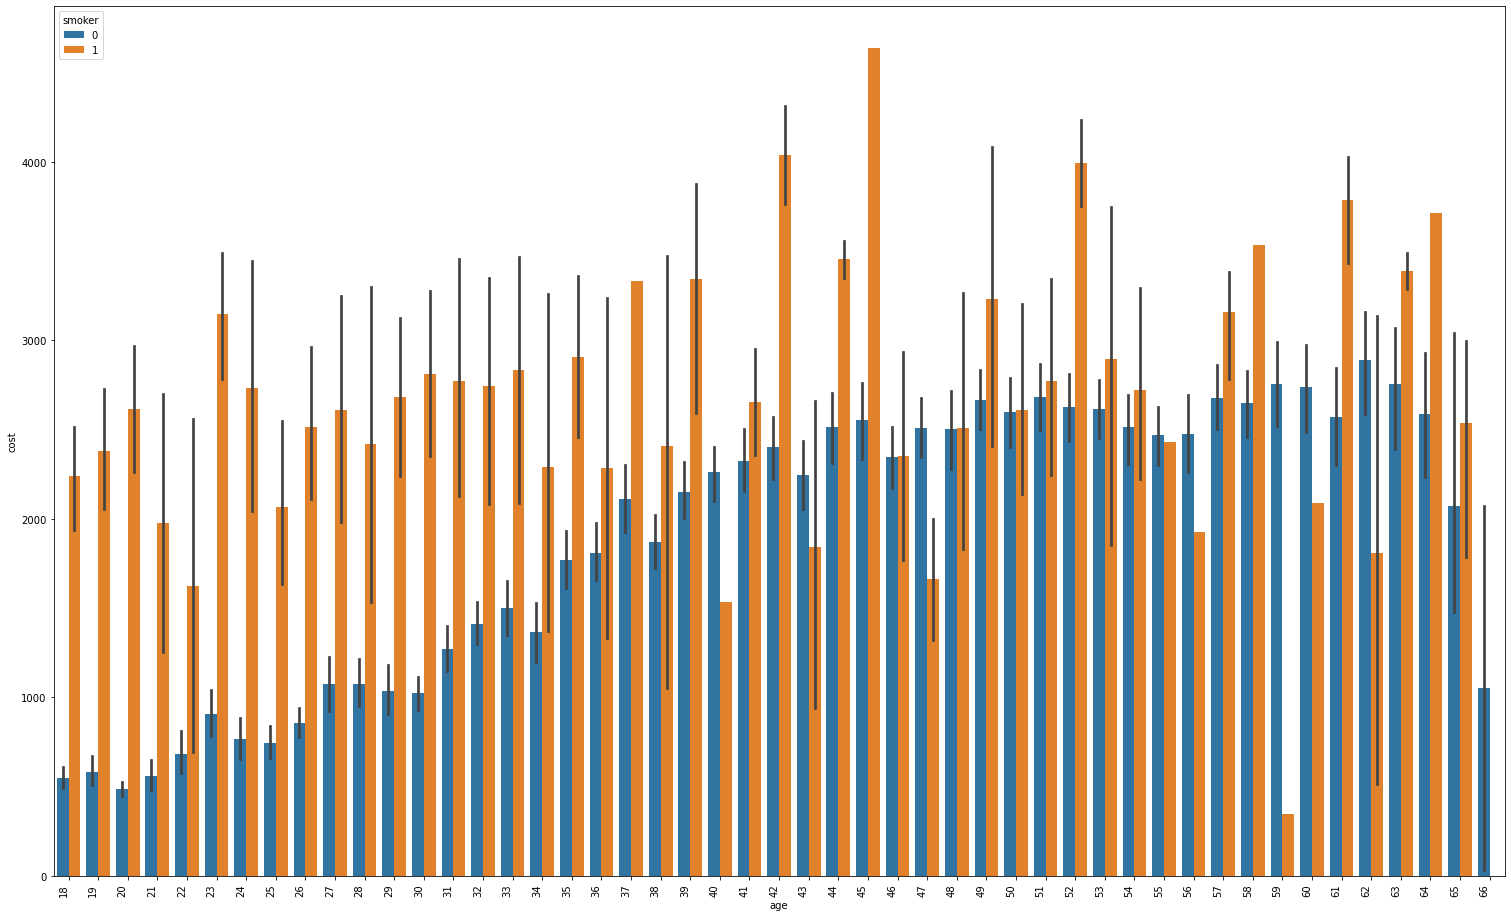

In [64]:
plt.figure(figsize=(26, 16))
sns.barplot(x='age', y='cost', hue='smoker', data=df2, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

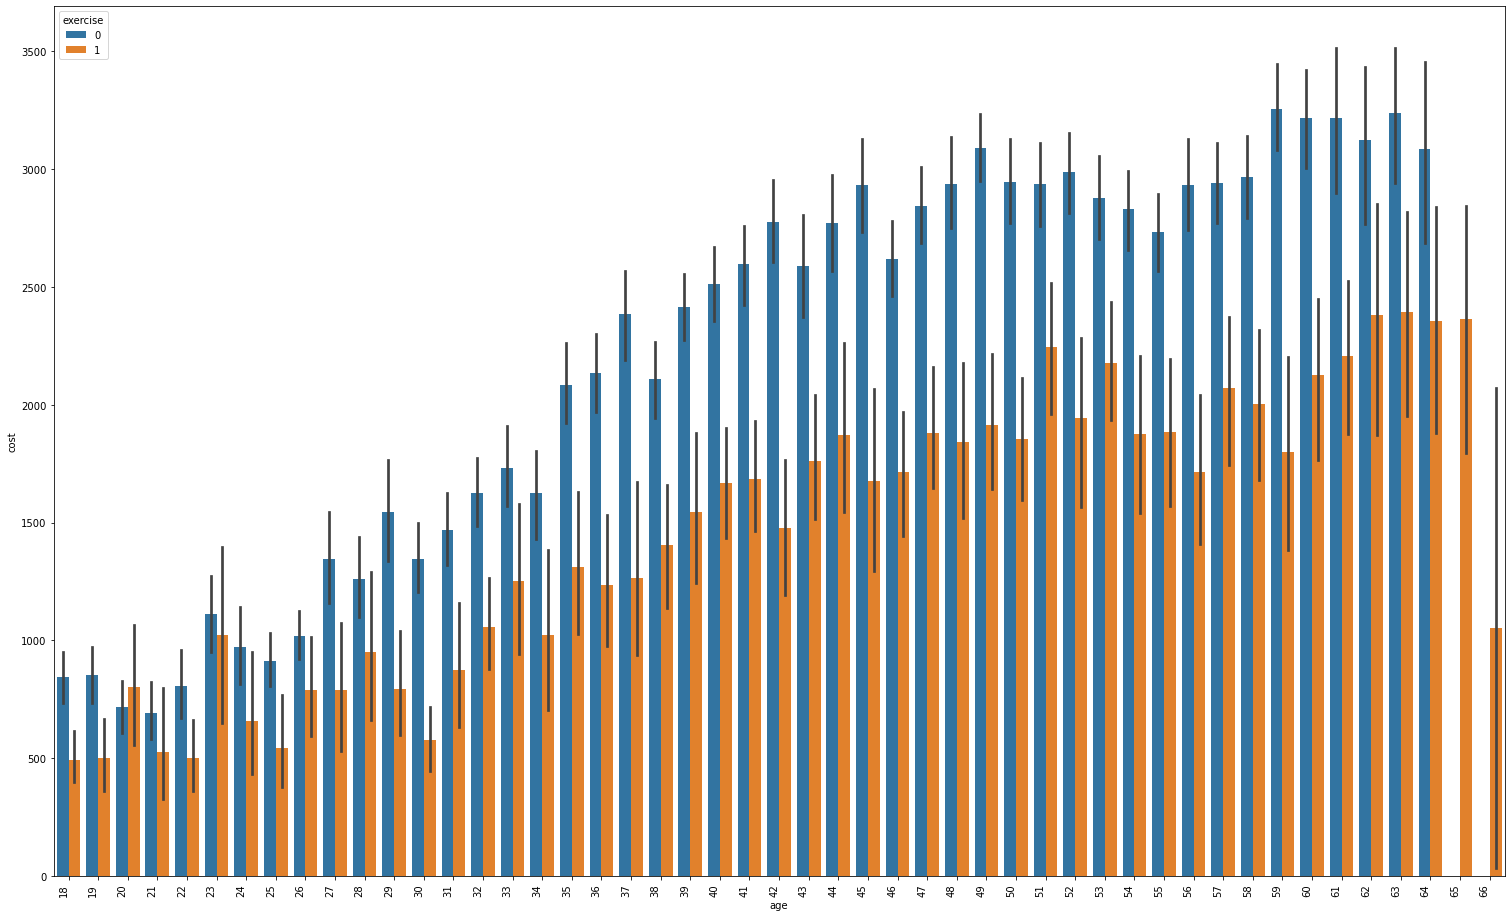

In [65]:
plt.figure(figsize=(26, 16))
sns.barplot(x='age', y='cost', hue='exercise', data=df2, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

In [74]:
datafile = merge_df.copy()

# Create dummy variables, excluding 'cost' and 'avgcost' columns
# pandas get_dummies automatically removes the first level of the categorical variable
dummy_data = pd.get_dummies(datafile.drop(['cost', 'avg_cost'], axis=1), drop_first=True)

# Specify the columns to keep
columns = ['age', 'bmi', 'children', "location_MASSACHUSETTS", "location_NEW JERSEY", "location_NEW YORK",
           "location_PENNSYLVANIA", "location_RHODE ISLAND", "location_type_Urban",
           "smoker_1", "education_level_Master", "education_level_No College Degree",
           "education_level_PhD", "yearly_physical_1", "exercise_1",
           "married_1", "gender_male", "exp_not expensive"]

# Filter the dummy_data DataFrame using the specified columns
train_data = dummy_data[columns]

# Split the data into training and test sets
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [76]:
import joblib
from sklearn.model_selection import GridSearchCV
# Assuming X_train and y_train are already defined
# Set up the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for tuning
param_grid = {'n_neighbors': list(range(1, 11))}  # 10 values from 1 to 10, adjust as needed

# Set up GridSearchCV for hyperparameter tuning and cross-validation
model_knn = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation, adjust as needed

# Train the model
model_knn.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model_knn, 'model_knn.pkl')

['model_knn.pkl']

In [77]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming X_train and y_train are already defined

# Create a pipeline that first centers and scales the data then applies SVM
model_svm = Pipeline([
    ('scaler', StandardScaler()),  # Centers and scales the data
    ('svm', SVC(kernel='linear'))  # SVM model with linear kernel
])

# Train the SVM model
model_svm.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model_svm, 'model_svm.pkl')

['model_svm.pkl']

In [78]:
from sklearn.neural_network import MLPClassifier

# Assuming X_train and y_train are already defined

# Create and train the neural network model
# The hyperparameters can be adjusted as needed
model_nnet = MLPClassifier(max_iter=100, hidden_layer_sizes=(100,), random_state=42)
model_nnet.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model_nnet, 'model_nnet.pkl')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


['model_nnet.pkl']

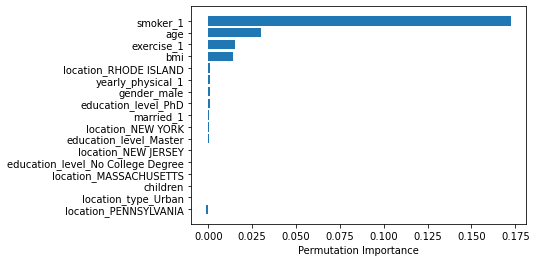

1    1812
0     463
dtype: int64
[[ 394  295]
 [  69 1517]]
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       689
           1       0.84      0.96      0.89      1586

    accuracy                           0.84      2275
   macro avg       0.84      0.76      0.79      2275
weighted avg       0.84      0.84      0.83      2275

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])


In [81]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Assuming model_knn is already defined and trained
model = model_svm

# Feature importance using permutation importance
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Plotting feature importances
sorted_idx = result.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

# Making predictions
predictions = model.predict(X_test)

# Displaying the prediction table
print(pd.Series(predictions).value_counts())

# Confusion matrix
print(confusion_matrix(y_test, predictions))

# Classification report (includes precision, recall, f1-score)
print(classification_report(y_test, predictions))

# Summary of the model
print(model)